<img src="https://www3.um.edu.uy/logoum.jpg" width=300>
<h1 align="center">Thesis - KNN Item Item Mean Reciprocal Rank</h1> 
<h2 align="center">Alejo Paullier</h2> 

https://lkpy.lenskit.org/en/stable/knn.html

# Import libraries and define evaluation function

In [1]:
from lenskit import batch, topn, util
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, als, item_knn as knn
from lenskit import topn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import style
import seaborn as sns
import numpy as np
import scipy as sp
import pylab as pl



ratings = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Demo\\ml-100k\\u.data', sep='\t',
                      names=['user', 'item', 'rating', 'timestamp'])


def eval(aname, algo, train, test):
    fittable = util.clone(algo) # Object cloning means to create an exact copy of the original object.
    fittable = Recommender.adapt(fittable) 
    fittable.fit(train) # Entrenamos el algoritmo con el training dataset
    users = test.user.unique() # Devuelve un array con los users unicos en el testing dataset
    # now we run the recommender
    recs = batch.recommend(fittable, users, 100)
    # add the algorithm name for analyzability
    recs['Algorithm'] = aname
    return recs

# Run manual optimization

In [ ]:
neighbours = []
mrr = [[] for _ in range(5)]

for i in range(1,21):
    neighbours.append(i*5)
    
for j in range(5):    
    for neighbour in neighbours:
        print(neighbour)
        all_recs = []
        test_data = []
        algo_ii = knn.ItemItem(neighbour,aggregate='weighted-average')

        for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):
            test_data.append(test)
            all_recs.append(eval('ItemItem', algo_ii, train, test))

        all_recs = pd.concat(all_recs, ignore_index=True)
        all_recs.head()

        test_data = pd.concat(test_data, ignore_index=True)

        rla = topn.RecListAnalysis()
        rla.add_metric(topn.recip_rank)
        recip = rla.compute(all_recs, test_data)

        mrr[j].append(recip["recip_rank"].mean())

# Load previously ran output

In [3]:
metric= pd.read_csv('C:\\Users\\Alejo\\Tesis\\Algoritmos\\KNN Item Item\\Manual optimization results\\mrr_metric.csv', sep=',')
neighbours = pd.DataFrame(neighbours)

metric =  pd.concat([neighbours,metric],axis=1)
names = columns=["neighbours","1","2","3","4","5"]
metric.columns = names
metric

,neighbours,1,2,3,4,5
0,5,0.112528,0.108068,0.118256,0.122114,0.113260
1,10,0.109243,0.117588,0.119771,0.116566,0.107034
2,15,0.105972,0.119812,0.111157,0.104450,0.111340
3,20,0.108648,0.101395,0.107400,0.107933,0.107631
4,25,0.096695,0.100681,0.101871,0.109304,0.100621
5,30,0.094186,0.089558,0.098514,0.103526,0.101598
6,35,0.094326,0.089722,0.099102,0.088444,0.094534
7,40,0.087680,0.097467,0.092866,0.091843,0.086497
8,45,0.083685,0.083522,0.087462,0.088938,0.097581
9,50,0.086989,0.089783,0.084592,0.089921,0.082979


# Highest MRR

In [13]:
print("Highest MRR:",max(metric[["1","2","3","4","5"]].mean(axis=1)))
idx = metric[["1","2","3","4","5"]].mean(axis=1).idxmax()
print("Optimal number of neighbours:", metric.iloc[idx]['neighbours'])
average = metric[["1","2","3","4","5"]].mean(axis=1)
average = pd.DataFrame(average)
average = pd.concat([neighbours,average],axis=1)
average.columns = ['Neighbours','Average MRR']
average

Highest MRR: 0.11484520983406206
Optimal number of neighbours: 5.0


,Neighbours,Average MRR
0,5,0.114845
1,10,0.114040
2,15,0.110546
3,20,0.106601
4,25,0.101835
5,30,0.097477
6,35,0.093226
7,40,0.091270
8,45,0.088238
9,50,0.086853


# Average plot

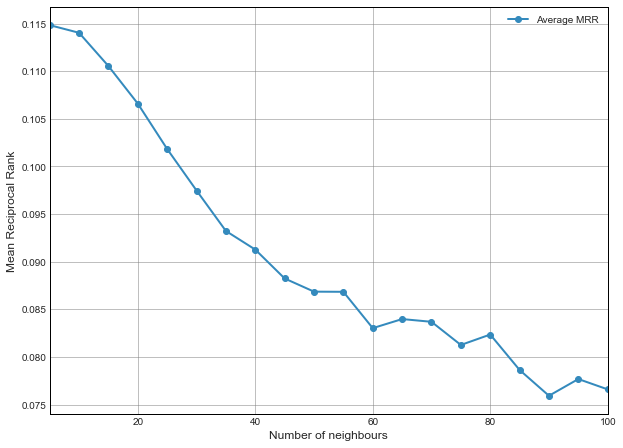

In [15]:
average.plot(x='Neighbours',y='Average MRR',grid=True, figsize=(10,7.5),marker='o')
style.use('seaborn-whitegrid')
plt.grid(color='gray')
plt.rc_context({'axes.edgecolor':'black'})
pl.xlabel("Number of neighbours")
pl.ylabel("Mean Reciprocal Rank")
plt.legend(loc='upper right')
plt.savefig('average_mrr')

# MRR plot

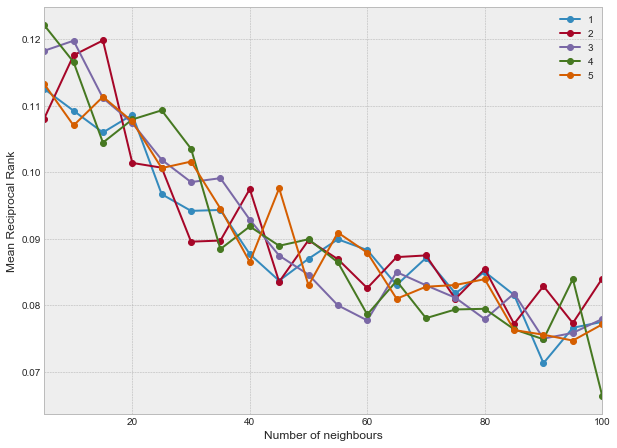

In [12]:
metric.plot(x="neighbours", y = ["1","2","3","4","5"], grid=True, figsize=(10,7.5),marker='o')
style.use('bmh')
pl.xlabel("Number of neighbours")
pl.ylabel("Mean Reciprocal Rank")
plt.legend(loc='upper right')